# Comparing Machine Learning Algorithms for Alzheimer's Disease Classification

### Initial Data Fetching and Cleaning 



In [143]:


# !pip install kaggle

import kaggle
import pandas as pd




# kaggle.api.authenticate()
# kaggle.api.dataset_download_files('rabieelkharoua/alzheimers-disease-dataset', unzip=True)



# API documentation: https://github.com/Kaggle/kaggle-api/blob/main/docs/README.md
# When downloading the dataset files from Kaggle, may happen that you would receive an SSL error messaje
# This may happen if you are working on corporate-managed device, and throws a certificatie verification error
# In my directory I saved the csv file downloaded named as 'data', located in a created folder: project
# All the coding below is with this saved file
# In a correct data download from API, you would see the below:



<img src="../project/api.png">


In [144]:
data= pd.read_csv('../project/data.csv')

print(data.shape)
data.head()
data.describe()



(2149, 35)


,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
count,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,...,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000
mean,5825.000000,74.908795,0.506282,0.697534,1.286645,27.655697,0.288506,10.039442,4.920202,4.993138,...,5.080055,0.208004,0.156817,4.982958,0.205212,0.158213,0.150768,0.158678,0.301536,0.353653
std,620.507185,8.990221,0.500077,0.996128,0.904527,7.217438,0.453173,5.757910,2.857191,2.909055,...,2.892743,0.405974,0.363713,2.949775,0.403950,0.365026,0.357906,0.365461,0.459032,0.478214
min,4751.000000,60.000000,0.000000,0.000000,0.000000,15.008851,0.000000,0.002003,0.003616,0.009385,...,0.000460,0.000000,0.000000,0.001288,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5288.000000,67.000000,0.000000,0.000000,1.000000,21.611408,0.000000,5.139810,2.570626,2.458455,...,2.566281,0.000000,0.000000,2.342836,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5825.000000,75.000000,1.000000,0.000000,1.000000,27.823924,0.000000,9.934412,4.766424,5.076087,...,5.094439,0.000000,0.000000,5.038973,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6362.000000,83.000000,1.000000,1.000000,2.000000,33.869778,1.000000,15.157931,7.427899,7.558625,...,7.546981,0.000000,0.000000,7.581490,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,6899.000000,90.000000,1.000000,3.000000,3.000000,39.992767,1.000000,19.989293,9.987429,9.998346,...,9.996467,1.000000,1.000000,9.999747,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Examination of the data

**1.** We have identified wide variety of features in the dataset, with a total of 35 columns. Which of these features are most critical to use as input variables to our machine learning models?

**2.** There are both intenger and float numerical features in the dataset.

**3.** For our model-centric approach to identify which machine learning model performs best when classifying Alzheimer’s diagnosis, we will use the below variables, total of 23 columns:
   
   *  **Demographics**
      * Id
      * Age
      * Gender
      * Ethnicity
      * Education level 
         <p> <br> </p>   
   * **Lifestyle Factors**
      * BMI
      * Smoking
      * Alcohol Consumption
      * Physical Activity
      * Diet Quality
      * Sleep Quality
        <p> <br> </p>  
   *  **Medical History**
      * Family History Alzheimers
      * Cardiovascular Disease
      * Diabetes
      * Depression
      * Head Injury
      * Hipertension
        <p> <br> </p>  
   * **Clinical Measurements**
      * SystolicBP
      * DiastolicBP
      * CholesterolTotal
      * Cholesterol ILDL
      * Cholesterol IHDL
      * Cholesterol Triglycerides
        <p> <br> </p>  





### Removing unnecessary columns from the dataset


In [78]:
##data.drop('column_name', axis=1)

dataclean = data.drop(data.columns[[23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34]], axis=1)
dataclean

        

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,Diabetes,Depression,HeadInjury,Hypertension,SystolicBP,DiastolicBP,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,1,1,0,0,142,72,242.366840,56.150897,33.682563,162.189143
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,0,0,0,0,115,64,231.162595,193.407996,79.028477,294.630909
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,0,0,0,0,99,116,284.181858,153.322762,69.772292,83.638324
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,0,0,0,0,118,115,159.582240,65.366637,68.457491,277.577358
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,0,0,0,0,94,117,237.602184,92.869700,56.874305,291.198780
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2144,6895,61,0,0,1,39.121757,0,1.561126,4.049964,6.555306,...,0,0,0,0,122,101,280.476824,94.870490,60.943092,234.520123
2145,6896,75,0,0,2,17.857903,0,18.767261,1.360667,2.904662,...,0,0,0,0,152,106,186.384436,95.410700,93.649735,367.986877
2146,6897,77,0,0,1,15.476479,0,4.594670,9.886002,8.120025,...,0,0,0,0,115,118,237.024558,156.267294,99.678209,294.802338
2147,6898,78,1,3,1,15.299911,0,8.674505,6.354282,1.263427,...,0,0,0,0,103,96,242.197192,52.482961,81.281111,145.253746


In [81]:
dataclean.columns



Index(['PatientID', 'Age', 'Gender', 'Ethnicity', 'EducationLevel', 'BMI',
       'Smoking', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality',
       'SleepQuality', 'FamilyHistoryAlzheimers', 'CardiovascularDisease',
       'Diabetes', 'Depression', 'HeadInjury', 'Hypertension', 'SystolicBP',
       'DiastolicBP', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL',
       'CholesterolTriglycerides'],
      dtype='object')

### High level analysis identifying Missing Data & Adding default Values

We would use **`Missing Data Percentage List`** visualization, as we have wide features in our dataset and we want to analyse each of them. However, we see that there is not any missing values in our dataset:




In [11]:
percent_missing = dataclean.isnull().sum() * 100 / len(dataclean)
percent_missing


PatientID                   0.0
Age                         0.0
Gender                      0.0
Ethnicity                   0.0
EducationLevel              0.0
BMI                         0.0
Smoking                     0.0
AlcoholConsumption          0.0
PhysicalActivity            0.0
DietQuality                 0.0
SleepQuality                0.0
FamilyHistoryAlzheimers     0.0
CardiovascularDisease       0.0
Diabetes                    0.0
Depression                  0.0
HeadInjury                  0.0
Hypertension                0.0
SystolicBP                  0.0
DiastolicBP                 0.0
CholesterolTotal            0.0
CholesterolLDL              0.0
CholesterolHDL              0.0
CholesterolTriglycerides    0.0
dtype: float64

In [145]:
print(dataclean.shape)


(2149, 23)


In [146]:
dataclean.dropna().shape


(2149, 23)

In [147]:
dataclean.dropna().shape


(2149, 23)

### Normalize the dataset
All of our features are numerical (int and float) so there is no need to normalize the data types.
Moreover, there is no need to correct the typo errors, or get rid of whitespaces. Let's see some data type examples:



In [148]:
dataclean['Age'].dtype
dataclean['Gender'].dtype
dataclean['Ethnicity'].dtype


dtype('int64')

In [149]:
dataclean['BMI'].dtype
dataclean['AlcoholConsumption'].dtype
dataclean['PhysicalActivity'].dtype


dtype('float64')

### Outliers 
We would use **`Box Plot`** to detect outliers for numeric features, as all of our features are numerical.

Does the features have a reasonable distribution in our variables?









In [117]:
# Code to identify all Outliers

def find_outliers_iqr(dataclean):
    Q1 = dataclean.quantile(0.25)
    Q3 = dataclean.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return dataclean[(dataclean < lower_bound) | (dataclean > upper_bound)]
for column in dataclean.select_dtypes(include=['float64', 'int64']):
    outliers = find_outliers_iqr(dataclean[column])
    if not outliers.empty:
        print(f"\nOutliers in '{column}':\n", outliers)
        




Outliers in 'Ethnicity':
 2       3
6       3
10      3
31      3
47      3
       ..
2099    3
2102    3
2105    3
2137    3
2147    3
Name: Ethnicity, Length: 211, dtype: int64

Outliers in 'CardiovascularDisease':
 9       1
14      1
16      1
20      1
29      1
       ..
2115    1
2130    1
2136    1
2140    1
2147    1
Name: CardiovascularDisease, Length: 310, dtype: int64

Outliers in 'Diabetes':
 0       1
5       1
11      1
14      1
25      1
       ..
2102    1
2118    1
2121    1
2132    1
2136    1
Name: Diabetes, Length: 324, dtype: int64

Outliers in 'Depression':
 0       1
12      1
14      1
18      1
41      1
       ..
2101    1
2108    1
2120    1
2135    1
2139    1
Name: Depression, Length: 431, dtype: int64

Outliers in 'HeadInjury':
 6       1
37      1
38      1
39      1
66      1
       ..
2069    1
2121    1
2126    1
2135    1
2139    1
Name: HeadInjury, Length: 199, dtype: int64

Outliers in 'Hypertension':
 8       1
11      1
15      1
17      1
30  

#### Output analysis

We are classifying this outliers as **`Natural Variation`**:
This outliers are a natural part of the dataset and are not due to any error. We consider to keeping it, because the data is informative about our subject area analysis. Features  Cardiovascular Disease, Diabetes, Depression, HeadInjury and Hypertension (all related with Medical History), have a binary or boolean data ( where 0 indicates No and 1 indicates Yes). In Ethnicity feature case, the information is classify as follows: 0 Caucasian, 1 African American, 2 Asian and 3 Other.

We would perform some data visualization with outliers, using different code and plot box to show the same result. Also we would visulize some normal distribution features to show visually that there is no any outlier in our dataset, and confirm the code above:




,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,Diabetes,Depression,HeadInjury,Hypertension,SystolicBP,DiastolicBP,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,0,0,0,0,99,116,284.181858,153.322762,69.772292,83.638324
6,4757,68,0,3,2,38.387622,1,0.646047,9.257695,5.897388,...,0,0,1,0,143,88,263.734149,52.470670,66.533369,216.489175
10,4761,89,0,3,1,39.463034,0,9.811292,8.819950,0.434020,...,0,0,0,0,131,86,224.526437,160.756475,68.328313,172.785220
31,4782,67,0,3,0,37.205177,0,12.215677,7.780544,6.433890,...,0,0,0,0,137,114,270.167740,118.891075,78.049441,272.804019
47,4798,69,1,3,0,16.480199,1,17.947653,0.307674,8.951570,...,0,0,0,0,145,106,240.148274,102.456383,52.677854,214.046483
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2099,6850,79,1,3,3,30.921927,1,17.597034,1.109198,5.776591,...,0,1,0,0,117,74,220.331567,154.751642,71.193359,184.193336
2102,6853,62,1,3,1,26.062347,0,6.131512,7.044546,1.218132,...,1,0,0,0,169,100,242.638342,86.378090,22.434765,271.977750
2105,6856,83,0,3,2,31.095664,0,7.542266,4.593094,7.603504,...,0,0,0,0,90,97,178.784641,102.162888,52.682715,137.629962
2137,6888,86,0,3,0,24.226040,0,10.890948,2.938590,5.530857,...,0,0,0,0,142,107,239.016543,147.525352,52.250165,306.384606


,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,Diabetes,Depression,HeadInjury,Hypertension,SystolicBP,DiastolicBP,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,0,0,0,0,99,116,284.181858,153.322762,69.772292,83.638324
6,4757,68,0,3,2,38.387622,1,0.646047,9.257695,5.897388,...,0,0,1,0,143,88,263.734149,52.470670,66.533369,216.489175
10,4761,89,0,3,1,39.463034,0,9.811292,8.819950,0.434020,...,0,0,0,0,131,86,224.526437,160.756475,68.328313,172.785220
31,4782,67,0,3,0,37.205177,0,12.215677,7.780544,6.433890,...,0,0,0,0,137,114,270.167740,118.891075,78.049441,272.804019
47,4798,69,1,3,0,16.480199,1,17.947653,0.307674,8.951570,...,0,0,0,0,145,106,240.148274,102.456383,52.677854,214.046483
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2099,6850,79,1,3,3,30.921927,1,17.597034,1.109198,5.776591,...,0,1,0,0,117,74,220.331567,154.751642,71.193359,184.193336
2102,6853,62,1,3,1,26.062347,0,6.131512,7.044546,1.218132,...,1,0,0,0,169,100,242.638342,86.378090,22.434765,271.977750
2105,6856,83,0,3,2,31.095664,0,7.542266,4.593094,7.603504,...,0,0,0,0,90,97,178.784641,102.162888,52.682715,137.629962
2137,6888,86,0,3,0,24.226040,0,10.890948,2.938590,5.530857,...,0,0,0,0,142,107,239.016543,147.525352,52.250165,306.384606


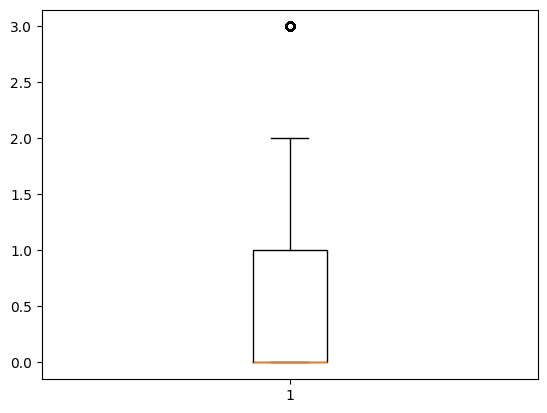

In [115]:
# Code to show Outliers in Ethnicity feature.



#select outliers
upper_limit = dataclean.Ethnicity.mean() + 1.5 * dataclean.Ethnicity.std()
lower_limit = dataclean.Ethnicity.mean() -1.5 * dataclean.Ethnicity.std()
display(dataclean[~((dataclean.Ethnicity < upper_limit) & (dataclean.Ethnicity > lower_limit))])



#Box plot for Ethnicity outliers

plt.figure(7)
plt.boxplot(dataclean.Ethnicity)

# Selecting Others Ethnicity (code 3) from our dataset
dataclean[(dataclean['Ethnicity']==3)]



#### Examples in normal distribution for Lifestyle Factors




{'whiskers': [<matplotlib.lines.Line2D at 0x2613bedf350>,
 'caps': [<matplotlib.lines.Line2D at 0x2613bedd550>,
 'boxes': [<matplotlib.lines.Line2D at 0x2613bede110>],
 'medians': [<matplotlib.lines.Line2D at 0x26138ab6e50>],
 'fliers': [<matplotlib.lines.Line2D at 0x26138ab7c90>],
 'means': []}

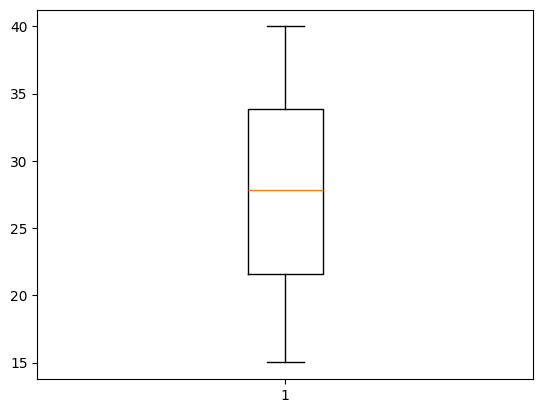

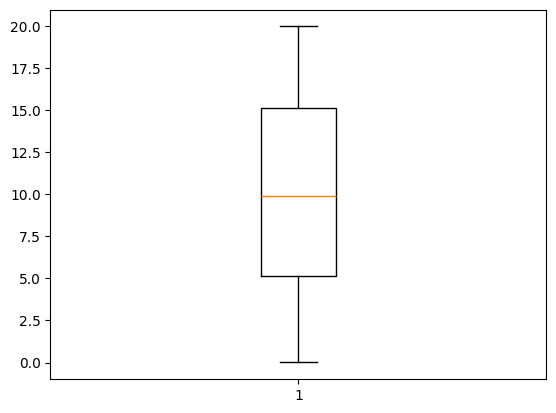

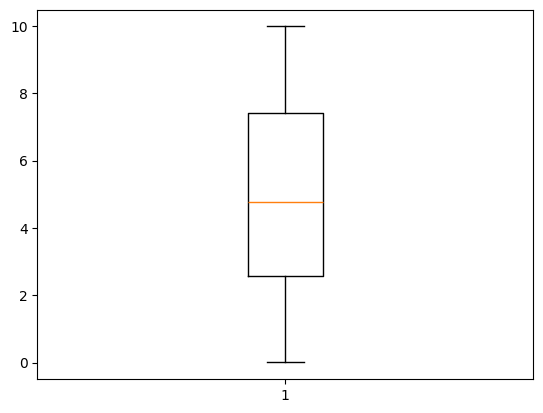

In [150]:
import matplotlib.pyplot as plt

plt.figure(1)
plt.boxplot(dataclean.BMI)

plt.figure(2)
plt.boxplot(dataclean.AlcoholConsumption)

plt.figure(3)
plt.boxplot(dataclean.PhysicalActivity)




#### Examples in normal distribution for Clinical Measurements




{'whiskers': [<matplotlib.lines.Line2D at 0x2613bb5d410>,
 'caps': [<matplotlib.lines.Line2D at 0x2613bb5fb90>,
 'boxes': [<matplotlib.lines.Line2D at 0x2613bb5d250>],
 'medians': [<matplotlib.lines.Line2D at 0x2613b953c90>],
 'fliers': [<matplotlib.lines.Line2D at 0x2613b950890>],
 'means': []}

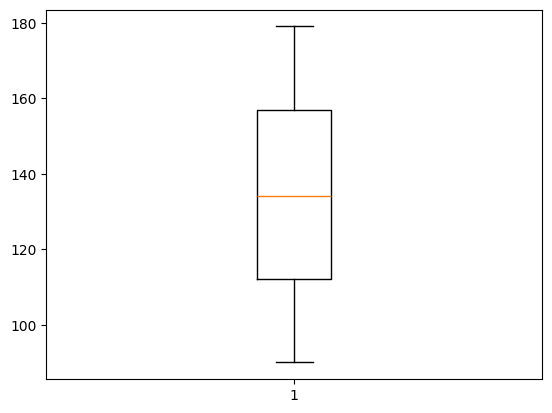

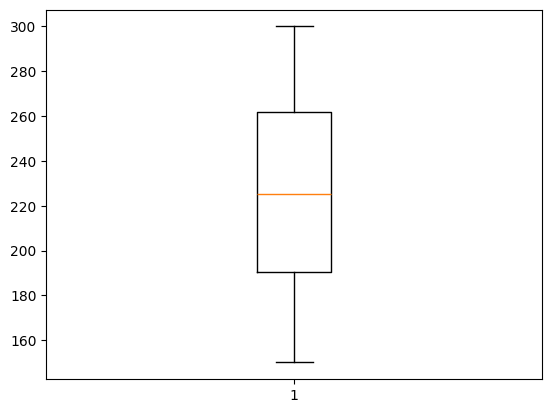

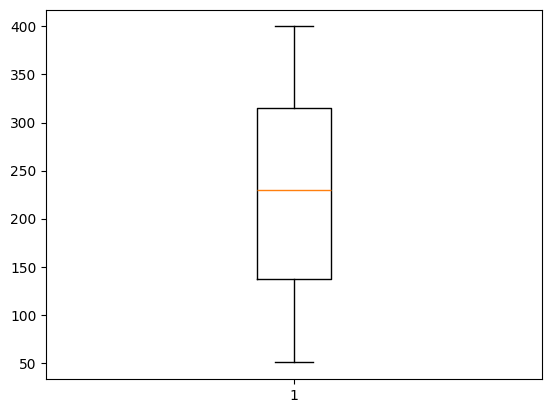

In [151]:
plt.figure(1)
plt.boxplot(dataclean.SystolicBP)

plt.figure(2)
plt.boxplot(dataclean.CholesterolTotal)

plt.figure(3)
plt.boxplot(dataclean.CholesterolTriglycerides)




### Saving clean data to a new file



In [162]:
#columns_to_keep = ['EducationLevel', 'Smoking', 'BMI', 'CholesterolTotal', 
      #              'Depression', 'AlcoholConsumption', 'Diabetes', 
        #            'PhysicalActivity', 'HeadInjury']

# Create a new DataFrame with only those columns
#data = data[columns_to_keep]

dataclean.to_csv('../project/new_data.csv', index=None)



data1=pd.read_csv('../project/new_data.csv')



In [166]:

print(data1.shape)
data1.head()


(2149, 23)


,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,Diabetes,Depression,HeadInjury,Hypertension,SystolicBP,DiastolicBP,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides
count,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,...,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000
mean,5825.000000,74.908795,0.506282,0.697534,1.286645,27.655697,0.288506,10.039442,4.920202,4.993138,...,0.150768,0.200558,0.092601,0.148906,134.264774,89.847836,225.197519,124.335944,59.463533,228.281496
std,620.507185,8.990221,0.500077,0.996128,0.904527,7.217438,0.453173,5.757910,2.857191,2.909055,...,0.357906,0.400511,0.289940,0.356079,25.949352,17.592496,42.542233,43.366584,23.139174,101.986721
min,4751.000000,60.000000,0.000000,0.000000,0.000000,15.008851,0.000000,0.002003,0.003616,0.009385,...,0.000000,0.000000,0.000000,0.000000,90.000000,60.000000,150.093316,50.230707,20.003434,50.407194
25%,5288.000000,67.000000,0.000000,0.000000,1.000000,21.611408,0.000000,5.139810,2.570626,2.458455,...,0.000000,0.000000,0.000000,0.000000,112.000000,74.000000,190.252963,87.195798,39.095698,137.583222
50%,5825.000000,75.000000,1.000000,0.000000,1.000000,27.823924,0.000000,9.934412,4.766424,5.076087,...,0.000000,0.000000,0.000000,0.000000,134.000000,91.000000,225.086430,123.342593,59.768237,230.301983
75%,6362.000000,83.000000,1.000000,1.000000,2.000000,33.869778,1.000000,15.157931,7.427899,7.558625,...,0.000000,0.000000,0.000000,0.000000,157.000000,105.000000,262.031657,161.733733,78.939050,314.839046
max,6899.000000,90.000000,1.000000,3.000000,3.000000,39.992767,1.000000,19.989293,9.987429,9.998346,...,1.000000,1.000000,1.000000,1.000000,179.000000,119.000000,299.993352,199.965665,99.980324,399.941862


In [168]:

data1.describe()


,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,Diabetes,Depression,HeadInjury,Hypertension,SystolicBP,DiastolicBP,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides
count,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,...,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000
mean,5825.000000,74.908795,0.506282,0.697534,1.286645,27.655697,0.288506,10.039442,4.920202,4.993138,...,0.150768,0.200558,0.092601,0.148906,134.264774,89.847836,225.197519,124.335944,59.463533,228.281496
std,620.507185,8.990221,0.500077,0.996128,0.904527,7.217438,0.453173,5.757910,2.857191,2.909055,...,0.357906,0.400511,0.289940,0.356079,25.949352,17.592496,42.542233,43.366584,23.139174,101.986721
min,4751.000000,60.000000,0.000000,0.000000,0.000000,15.008851,0.000000,0.002003,0.003616,0.009385,...,0.000000,0.000000,0.000000,0.000000,90.000000,60.000000,150.093316,50.230707,20.003434,50.407194
25%,5288.000000,67.000000,0.000000,0.000000,1.000000,21.611408,0.000000,5.139810,2.570626,2.458455,...,0.000000,0.000000,0.000000,0.000000,112.000000,74.000000,190.252963,87.195798,39.095698,137.583222
50%,5825.000000,75.000000,1.000000,0.000000,1.000000,27.823924,0.000000,9.934412,4.766424,5.076087,...,0.000000,0.000000,0.000000,0.000000,134.000000,91.000000,225.086430,123.342593,59.768237,230.301983
75%,6362.000000,83.000000,1.000000,1.000000,2.000000,33.869778,1.000000,15.157931,7.427899,7.558625,...,0.000000,0.000000,0.000000,0.000000,157.000000,105.000000,262.031657,161.733733,78.939050,314.839046
max,6899.000000,90.000000,1.000000,3.000000,3.000000,39.992767,1.000000,19.989293,9.987429,9.998346,...,1.000000,1.000000,1.000000,1.000000,179.000000,119.000000,299.993352,199.965665,99.980324,399.941862
